In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Timedelta
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
chicagoDF: DataFrame = pd.read_csv('./data/chicago_marathon_2018.csv')

In [3]:
# Create a new column called country and extract the country from the end of the names of marathoners using regex
chicagoDF['country'] = chicagoDF['name'].str.extract('\((.{3})\)')

In [4]:
chicagoDF['country'].value_counts()

USA    13874
MEX     1229
GBR      914
CHN      815
CAN      730
       ...  
TUN        1
JOR        1
UAE        1
BDI        1
CAY        1
Name: country, Length: 111, dtype: int64

In [5]:
def binCountries(countryBinName: str) -> str:
    if countryBinName in ['USA', 'MEX', 'GBR', 'CHN', 'CAN']:
        return countryBinName
    else:
        return 'Other'

In [6]:
chicagoDF['country'] = chicagoDF['country'].apply(binCountries)

In [7]:
chicagoDF['half'] = chicagoDF['half'].apply(pd.to_timedelta)

In [8]:
chicagoDF['half'].apply(type)

0        <class 'pandas._libs.tslibs.timedeltas.Timedel...
1        <class 'pandas._libs.tslibs.timedeltas.Timedel...
2        <class 'pandas._libs.tslibs.timedeltas.Timedel...
3        <class 'pandas._libs.tslibs.timedeltas.Timedel...
4        <class 'pandas._libs.tslibs.timedeltas.Timedel...
                               ...                        
23906        <class 'pandas._libs.tslibs.nattype.NaTType'>
23907    <class 'pandas._libs.tslibs.timedeltas.Timedel...
23908    <class 'pandas._libs.tslibs.timedeltas.Timedel...
23909    <class 'pandas._libs.tslibs.timedeltas.Timedel...
23910        <class 'pandas._libs.tslibs.nattype.NaTType'>
Name: half, Length: 23911, dtype: object

In [9]:
def toSeconds(someTime: Timedelta) -> float:
    return someTime.total_seconds()

In [10]:
chicagoDF['half'] = chicagoDF['half'].apply(toSeconds)

In [11]:
chicagoDF['finish'] = chicagoDF['finish'].apply(pd.to_timedelta)
chicagoDF['finish'] = chicagoDF['finish'].apply(toSeconds)

In [12]:
chicagoDF['division'].value_counts()

35-39    4037
40-44    3845
45-49    3527
30-34    3501
50-54    2568
25-29    2566
55-59    1621
60-64     831
20-24     817
65-69     346
16-19     110
70-74     104
75-79      27
on80+      11
Name: division, dtype: int64

In [13]:
population: DataFrame = chicagoDF[['half', 'finish', 'division', 'country']].copy()
population = population.dropna()    

In [14]:
population['division'] = LabelEncoder().fit_transform(population['division'])

In [15]:
population['country'] = LabelEncoder().fit_transform(population['country'])

In [16]:
scaledPopulation = MinMaxScaler().fit_transform(population)

In [17]:
print(scaledPopulation)

[[2.19170076e-04 0.00000000e+00 3.07692308e-01 4.00000000e-01]
 [7.30566920e-05 5.18237991e-04 1.53846154e-01 8.00000000e-01]
 [7.30566920e-05 1.55471397e-03 1.53846154e-01 8.00000000e-01]
 ...
 [6.76870251e-01 9.45026909e-01 7.69230769e-01 1.00000000e+00]
 [6.60432496e-01 9.49212677e-01 6.92307692e-01 1.00000000e+00]
 [6.79208065e-01 1.00000000e+00 5.38461538e-01 1.00000000e+00]]


In [18]:

inertiaMeasurement: dict = {}

clusters = range(1,20)

for potentialClusterSize in clusters:
    kMeansModel: KMeans = KMeans(n_clusters=potentialClusterSize).fit(scaledPopulation)
    inertiaMeasurement[potentialClusterSize] = kMeansModel.inertia_

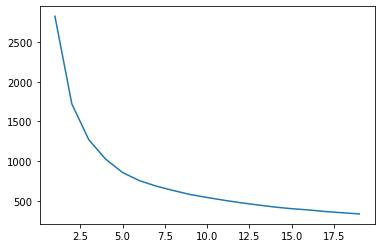

In [19]:
plt.plot(list(inertiaMeasurement.keys()), list(inertiaMeasurement.values()))


In [20]:
optimalClusterSizeModel: KMeans = KMeans(n_clusters=3).fit(scaledPopulation)

In [21]:
clusterNumberVector = optimalClusterSizeModel.predict(scaledPopulation)

In [22]:
predictedLabels: DataFrame = pd.DataFrame(clusterNumberVector, columns= ['ClusterNumberVector'])

In [23]:
labeledPopulation: DataFrame = chicagoDF.join(predictedLabels, how='inner')

In [24]:
labeledPopulation.head()

,place_overall,place_gender,bib,name,division,half,finish,country,ClusterNumberVector
0,1,1,1,"Farah, Mo (GBR)",35-39,3786.0,7511.0,GBR,2
1,2,2,2,"Bayih, Mosinet Geremew (ETH)",25-29,3784.0,7524.0,Other,1
2,3,3,3,"Osako, Suguru (JPN)",25-29,3784.0,7550.0,Other,1
3,4,4,4,"Kipkemoi, Kenneth (KEN)",30-34,3784.0,7557.0,Other,1
4,5,5,5,"Rupp, Galen (USA)",30-34,3784.0,7581.0,USA,1


In [25]:
scaledPopulationDF : DataFrame = pd.DataFrame(scaledPopulation)

In [26]:
labeledPopulation: DataFrame = scaledPopulationDF.join(predictedLabels, how='inner')

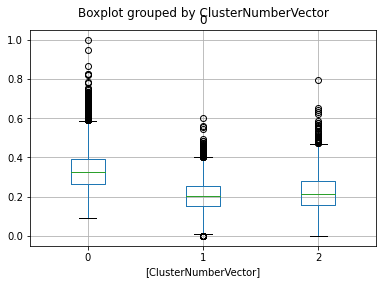

In [27]:
labeledPopulation.boxplot([0],by=['ClusterNumberVector'])

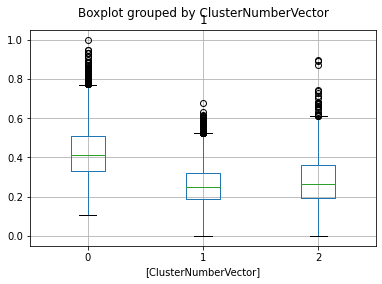

In [28]:
labeledPopulation.boxplot([1],by=['ClusterNumberVector'])

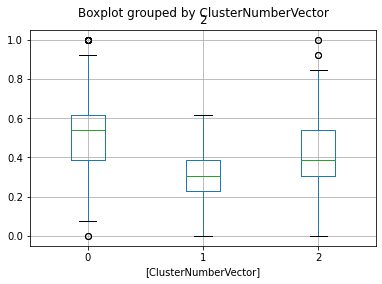

In [29]:
labeledPopulation.boxplot([2],by=['ClusterNumberVector'])

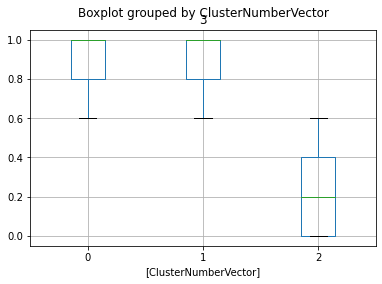

In [30]:
labeledPopulation.boxplot([3],by=['ClusterNumberVector'])

In [31]:
from  sklearn.decomposition import PCA

In [32]:
#PCA - Principle Component Analysis

In [33]:
# reducing the dimensions
essentialEigenVectors: PCA = PCA(n_components=2)

In [34]:
essentialEigenVectors.fit(scaledPopulation)

PCA(n_components=2)

In [35]:
print(essentialEigenVectors.explained_variance_ratio_)

[0.52593179 0.27468186]


In [36]:
transformedPopulation: PCA = essentialEigenVectors.transform(scaledPopulation)

In [37]:
transformedPopulationDF: DataFrame = pd.DataFrame(transformedPopulation, columns=['pc1', 'pc2'])

In [38]:
transformedPopulationDF.head()

,pc1,pc2
0,0.498896,-0.312714
1,0.093570,-0.444508
2,0.093440,-0.443925
3,0.099154,-0.390391
4,-0.097855,-0.402486


In [39]:

inertiaMeasurement: dict = {}

clusters = range(1,20)

for potentialClusterSize in clusters:
    kMeansModel: KMeans = KMeans(n_clusters=potentialClusterSize).fit(transformedPopulation)
    inertiaMeasurement[potentialClusterSize] = kMeansModel.inertia_

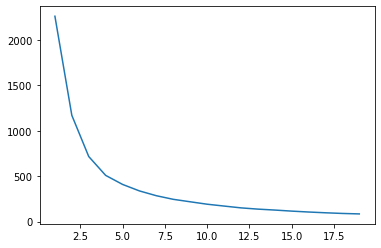

In [40]:
plt.plot(list(inertiaMeasurement.keys()), list(inertiaMeasurement.values()))

In [41]:
optimalClusterSizeModel: KMeans = KMeans(n_clusters=3).fit(transformedPopulation)

In [42]:
clusterNumberVector = optimalClusterSizeModel.predict(transformedPopulationDF)

In [43]:
predictedLabels: DataFrame = pd.DataFrame(clusterNumberVector, columns=['ClusterNumber'])

In [44]:
transformedPopulationDF['Cluster'] = predictedLabels

In [45]:
import hvplot.pandas

In [46]:
transformedPopulationDF.hvplot.scatter(
    x = 'pc1',
    y = 'pc2',
    by = 'Cluster'
)

:NdOverlay   [Cluster]
   :Scatter   [pc1]   (pc2)